<a href="https://colab.research.google.com/github/cmelende/CS5262-50_Project/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**

Cory Melendez

### Background:
One of the most coveted types of prediction, maybe only second to knowing the lottery numbers, is that of the stock market. Stock traders, that is Non HFT/algo traders, will typically look to tools such as quantitative analysis (QA). They attempt to detect patterns that arise from human behavior, believed to be unchanging. This project instead attempts to use ML models in order to build up a scientifically more sound method than methods such as QA that can predict how the market will move in the very short term.

One of the challenges to this project, and will require further research, is to identity not only if our model will have an acceptable accuracy using the data below, but why. Markets are ever-changing, and are constantly affected not only by geoeconomic events, but geopolitical events as well. Identifying the circumstances where it *could* work and *when* it could work is just as important as building the model itself. We found paper 1, which goes over how researchers used this dataset, and paper 2, a summary of 100 published articles, to be a good starting point in understanding what we will call the 'reproducability' problem as well as understanding how to build our models better.

The last challenge is the size of the data, I'll be trimming the number of columns not only to stay under the column limit, but to better narrow down and understand the factors that contribute to the output.



### Project Description: 
This project's main aim is to output a binary classificiation that will be able to tell a theoritical day trader whether or not they should buy and sell a stock on a certain day.This project will use data from link below in order to build our ML models. We will also refer to the paper below in order for not only reference on how a model can be built, but to also refer to it for understanding the domain.

Our main methodology will be to groom the data into something that is digestible by the model. Since our aim is to only output a binary classification (yes/no), the question we will be asking our model is 'should i buy the stock at close today and sell at close of tomorrow'. This simple strategy will simplify the model greatly, but will require restructuring the data and creating a target column that our model predicts.

Our simple goals that define success is as follows: Can we beat not entering the market at all (not investing)? Can our model beat a trading algorithm that simply randomly outputs yes/no? A goal beyond that would be to answer: What other non-ML algorithms, in the same time and circumstances, can our model beat?


Data: https://archive.ics.uci.edu/ml/datasets/CNNpred%3A+CNN-based+stock+market+prediction+using+a+diverse+set+of+variables

Paper: https://reader.elsevier.com/reader/sd/pii/S0957417419301915?token=746C33D1046F2DDA4EE614C2A4606AF2260493F0DC652081FF1F03968E01DC023369A293A638CEE35E24DB8BB7EE1259&originRegion=us-east-1&originCreation=20230119051158

Paper 2: https://reader.elsevier.com/reader/sd/pii/S0957417421009441?token=EEE8A8BF467B1370F99F73C46DC7AD74D88F0AB17AC08F5137A3B16E14E69D382DE8A689EF492C09E0CF67690D289807&originRegion=us-east-1&originCreation=20230119052216

### Performance Metric: 

Our metric will be pretty simple, given any trade, or a group of trades, advised by the model, is: 

(current price - bought price ) * X > X * epsilon, where X is the amount of money that was invested and epsilon is any arbitrary small positive number

 
If this statement is true, then our model has outperformed our money not entering the market at all by an arbitrary small number.

Furthermore, 

does:

Sum(MLProfit) > Sum(RandomProfit) * epsilon

Where Sum(MLProfit) is the profit made from a arbitrary number of trades using our ML model greater, and Sum(RandomProfit) is the profit madae from an arbitrary number of trades using a random output algorithm, and epsilon is an arbitrary small number

If so, then we have beaten randomness by a factor of epsilon and have met our main objective.





### Description 

Questions that we want answered by EDA
1. Is there a correlation between oil and stock prices or oil and gold?
2. Is there any difference between any stock or commodoties b/tw different exchanges?
3. What is the correlation between volume and close within the same exchange and the correlation of volume and close between two exchanges?

### EDA

In [36]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#import NYSE data
nyse_file = 'Processed_NYSE.csv'
nyse = pd.read_csv(nyse_file)
display(nyse.sample(5))

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
56,2010-03-24,7408.160156,0.066667,-0.009453,0.008066,0.004355,-0.007620,-0.882641,1.098442,3.398626,...,-0.23,-2.27,-0.89,-0.43,1.40,1.22,1.16,0.03,-2.59,-1.37
1744,2016-12-05,10910.900391,0.030620,0.006672,0.000886,-0.000874,0.001919,0.946193,1.880484,2.428223,...,0.06,-0.23,1.96,0.56,-0.49,-0.74,-0.67,1.36,0.06,-0.57
1936,2017-09-11,12010.370117,-0.003249,0.010295,0.000705,0.000564,0.003870,0.774370,1.679134,2.654227,...,-0.14,-0.69,0.98,1.02,1.24,0.57,0.60,-0.74,-1.00,-1.43
1972,2017-10-31,12341.009766,0.046014,0.001748,-0.003797,0.001133,0.001285,-0.515764,-0.072550,-0.045195,...,-0.44,-0.93,0.66,0.18,0.33,-0.02,-0.01,-1.59,-0.98,-0.56
199,2010-10-15,7520.600098,0.152030,-0.003444,-0.001972,0.009597,0.001419,0.564025,2.517615,3.007244,...,0.01,-1.72,-0.58,0.13,0.35,0.51,0.51,-0.30,-1.30,-0.88


In [38]:
#import NASDAQ data
nasdaq_file = 'Processed_NASDAQ.csv'
nasdaq = pd.read_csv(nasdaq_file)

display(nasdaq.sample(5))

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
1634,2016-06-29,4779.250000,0.020472,0.018624,0.021206,-0.024117,-0.041152,-1.118689,-1.151623,-3.927724,...,0.91,1.64,2.17,1.89,-0.25,-0.54,-0.50,-3.06,2.98,0.49
1123,2014-06-19,4359.330078,-0.008169,-0.000804,0.005905,0.003733,0.002424,1.435680,1.468732,2.621968,...,-0.17,4.40,-0.03,0.08,-0.15,-0.33,-0.32,1.30,4.22,3.26
1201,2014-10-09,4378.339844,-0.076443,-0.020197,0.019016,-0.015624,-0.004652,-1.170610,-1.979295,-4.682565,...,-0.52,2.07,-2.44,-1.87,0.26,0.29,0.26,-2.86,-0.23,0.20
854,2013-05-24,3459.139893,-0.204024,-0.000081,-0.001120,-0.011085,0.001627,-1.138337,0.656461,2.382919,...,-0.49,-0.05,0.08,0.03,-0.73,-0.05,-0.12,-1.22,-0.80,-0.37
747,2012-12-19,3044.360107,-0.043944,-0.003329,0.014592,0.013216,-0.006961,1.013669,2.376170,1.757485,...,-0.86,-1.74,0.07,-0.59,0.04,-0.10,-0.11,-0.77,-1.93,-0.19


In [39]:
correlation_cols = ['Oil', 'Gold', 'AAPL', 'AMZN', 'GE', 'JPM', 'JNJ', ]
correlation = nasdaq[correlation_cols].corr()
round(correlation, 5)

,Oil,Gold,AAPL,AMZN,GE,JPM,JNJ
Oil,1.00000,-0.01161,0.12139,0.12106,0.18079,0.17923,0.09726
Gold,-0.01161,1.00000,-0.03107,-0.00134,-0.00862,-0.01866,-0.00395
AAPL,0.12139,-0.03107,1.00000,0.33762,0.35107,0.34972,0.29441
AMZN,0.12106,-0.00134,0.33762,1.00000,0.32820,0.32766,0.31801
GE,0.18079,-0.00862,0.35107,0.32820,1.00000,0.62430,0.48263
JPM,0.17923,-0.01866,0.34972,0.32766,0.62430,1.00000,0.46843
JNJ,0.09726,-0.00395,0.29441,0.31801,0.48263,0.46843,1.00000


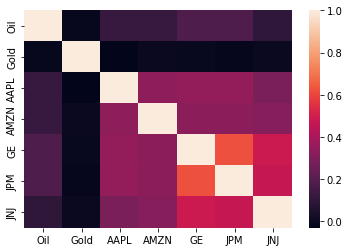

In [40]:
sns.heatmap(correlation)

In [41]:
stock_cols = ['Oil', 'Gold', 'AAPL', 'AMZN', 'GE', 'JPM', 'JNJ']
diff_df = pd.DataFrame()
for stock in stock_cols: 
  diff_df[f'Difference_{stock}'] = abs(nasdaq[stock] - nyse[stock])

display(diff_df)

,Difference_Oil,Difference_Gold,Difference_AAPL,Difference_AMZN,Difference_GE,Difference_JPM,Difference_JNJ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1979,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
sum_df = pd.DataFrame()

for stock in stock_cols: 
    sum_df[f'Sum_{stock}'] = pd.Series([diff_df[f'Difference_{stock}'].sum()])

display(sum_df)

,Sum_Oil,Sum_Gold,Sum_AAPL,Sum_AMZN,Sum_GE,Sum_JPM,Sum_JNJ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
corr = pd.DataFrame()

corr['nasdaq_close'] = pd.Series(nasdaq['Close'])
corr['nyse_close'] = pd.Series(nyse['Close'])
corr['nasdaq_volume'] = pd.Series(nasdaq['Volume'])
corr['nyse_volume'] = pd.Series(nyse['Volume'])


display(corr)

,nasdaq_close,nyse_close,nasdaq_volume,nyse_volume
0,2269.149902,7184.959961,NaN,NaN
1,2308.419922,7326.740234,0.560308,0.921723
2,2308.709961,7354.870117,0.225994,-0.375903
3,2301.090088,7377.700195,-0.048364,0.996234
4,2300.050049,7393.930176,0.007416,0.059932
...,...,...,...,...
1979,6750.049805,12339.660156,0.058830,-0.017375
1980,6750.939941,12322.599609,-0.116863,-0.089962
1981,6757.600098,12316.820313,-0.000091,-0.024084
1982,6737.870117,12280.110352,0.005087,0.070184


In [44]:
display(corr.corr())

# There is a very strong correlation between the closing price of one exchange and the close of another as well as a strong correlation between the volume of trades between two exchanges. Surprisingly, its much a stronger correlation than the close and the volume within the same exchange. I hypothesize it'll still be worth to keep the weaker correlations in mind, since in our business context, the summation of several small indicators could improve our model. Additionally, we are not going for huge investment returns, so being able to recognize these correlations may help with getting a very small return. 

,nasdaq_close,nyse_close,nasdaq_volume,nyse_volume
nasdaq_close,1.000000,0.958823,-0.014511,-0.026418
nyse_close,0.958823,1.000000,-0.020627,-0.023258
nasdaq_volume,-0.014511,-0.020627,1.000000,0.552645
nyse_volume,-0.026418,-0.023258,0.552645,1.000000


In [45]:
diff = pd.DataFrame();

diff['difference_close'] = abs(nasdaq['Close'] - nyse['Close'])
diff['difference_volume'] = abs(nasdaq['Volume'] - nyse['Volume'])


display(diff)

,difference_close,difference_volume
0,4915.810059,NaN
1,5018.320312,0.361416
2,5046.160156,0.601897
3,5076.610107,1.044599
4,5093.880127,0.052516
...,...,...
1979,5589.610351,0.076205
1980,5571.659668,0.026901
1981,5559.220215,0.023993
1982,5542.240235,0.065097


In [46]:
display(diff.corr())

,difference_close,difference_volume
difference_close,1.000000,-0.088046
difference_volume,-0.088046,1.000000


In [47]:
cols = ['Close','Volume','DTB4WK','DTB3','DTB6','DTB3','DTB6','Oil','Gold','XOM','JPM','GE','JNJ','WFC','AMZN','MSFT','DJI']

print(f'negative classification count: {nasdaq[cols].lt(0).sum().sum() + nyse[cols].lt(0).sum().sum()}');
print(f'positive classification count: {nasdaq[cols].gt(0).sum().sum() + nyse[cols].gt(0).sum().sum()}');


negative classification count: 21214
positive classification count: 45492


### Answers 

Answers to questions: 
1. Is there a correlation between oil and stock prices or oil and gold?
  * Surprisingly, accoring to our correlation matrix, there is a very small correlation between oil and gold. I orginally thought that we would see a stronger relationship between oil and gold since gold is a physical commodity like oil. However, we see a much stronger correlation between our stock and oil, even when most of our stocks are from industries that one wouldnt think would be heavily reliant on oil.
2. Is there any difference between any stock or commodoties b/tw different exchanges?
  * This may need to be researched further to confirm, but I was initially afraid that different stock exchanges would have slightly different prices. But according to our NASDAQ and NYSE data, they all have the same prices and there is zero difference between these two csv's. This means that the data is copied between csv's, and we only have to pull that data from one CSV when we get to combining.
3. What is the correlation between volume and close within the same exchange and the correlation of volume and close between two exchanges?
  * There is a very strong correlation between the closing price of one exchange and the close of another as well as a strong correlation between the volume of trades between two exchanges. Surprisingly, its much a stronger correlation than the close and the volume within the same exchange. I hypothesize it'll still be worth to keep the weaker correlations in mind, since in our business context, the summation of several small indicators could improve our model. Additionally, we are not going for huge investment returns, so being able to recognize these correlations may help with getting a very small return. 




### Feature Engineering

Luckily, almost all of our data is numeric, and doesnt require much cleaning. The values that we are looking at are all present. However, we'll want to do the following:

* Research our stock symbols and decide what industry they belong to, add a column indicating the industry. This will be later used for a one hot encoder
* Since this project would normally use a time series approach, we'll want to add additional columns to get around this. Each row has to be indepedent of the previous rows, so we will add the return % of one or several of the previous days to simulate time series. Since in our business context, we are trading on behalf of a day trader, we dont have to add many of these columns.
* We will drop all features that are not listed in our data_dictionary.csv as the first step in our pipeline
* We'll have to massage our data a little bit. We know that there are some columns whose data is repeated across the CSVs (like stock prices and commodoties) so we can extract that information from just one of the CSVs. Then, we'll want to transform the rest of the columns (ex: close/volume) into multiple columns, so we have NYSE_Close, NYSE_Volume, NASDAQ_Close, NASDAQ_Volume, etc., so we dont have multiple rows representing the same day.
* We'll also need to extract the return % of each stock exchange, the data is a little weird where the % return for a stock exchange x is not in that csv for x. Example: Nasdaq doesnt have the % return for the nasdaq but has NYSE, S&P, etc., we'll want to make sure all % returns our in our dataset. 
* Further investigation is also needed to combine and average: 
  * The % return of each stock exchange
  * Volume
  * Closing price
* Lastly, we'll want to transform the date column into something that we can sort by if needed. We can transform this column from a format 'mm-dd-yyyy' to a number yyyymmdd which will rank by year first, then month, then day.

### Train/Test Split
Train: 70%
Test: 20%
Holdout: 10%

We'll want a good size test dataset since we seem to have more positive values in our dataset (and assuming that positive values equate to roughly a outcome of true, that is, to decision to trade) than negative values. We'll also want to carve out a holdout for fine tuning our hyperparameters. 

### Initial Pipeline
We'll have to do some manual work before definign our pipeline
1. Remove features that are not in our data_dictionary.csv
2. Combine all data that is the same (stock and commodity prices) and for things like volume/close, prepend with the exchange they came from and add them to one dataset.

We can define a loose schema for the pipeline as follows
1. Supplement, either by another CSV, or by looking up a dictionary that we provide in memory, the industry each stock belongs to and add the feature to the dataset
2. Add previous' days returns to get around time series problem
3. (Test) Combine and average: 
  * the % return of each stock exchange
  * Volume
  * closing price
4. Transform date string into numeric value
5. One hot encode the type of industry for each stock to split into multiple bool (0/1) values. 
6. Adding onto 5, add more features to represent the average % return of each type of industry for each day. This may also be required to add extra columns like we did in 2 so each row knows about those metrics and are not dependent on previous rows' values.

### Model Fitting & Evaluation
Our Assumptions:

1. Once we generate the type of industry each stock belongs to, I believe that we wil be better able to identify which stocks will go up. For example, if most tech stocks did well yesterday, there may be a correlation that we can use to determine if a tech stock will do good today.
2. We're assuming that we will not have to add a large of amount of columns to avoid the 'time series' problem, and that adding for example a yesterdays return feature to each row will be enough for the model to predict a correct outcome.
3. Volume/Close are doing a lot of the heavy lifting, since our stock and commodity prices are duplicated among our CSVs, volume/close are the main two columns that are signficant and are particular to that exchange.